In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')
df.head()
print(df['Sex'].unique())
print(df.isna().sum()) # есть пропуск значений в колонках Age, Cabin, Embarked
df.describe()

['male' 'female']
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Cabin'] = df['Cabin'].fillna('Unknown') # или в дальнейшем просто удалить строки с пропущенным значением
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) # модальное значение - наиб. часто встречающееся

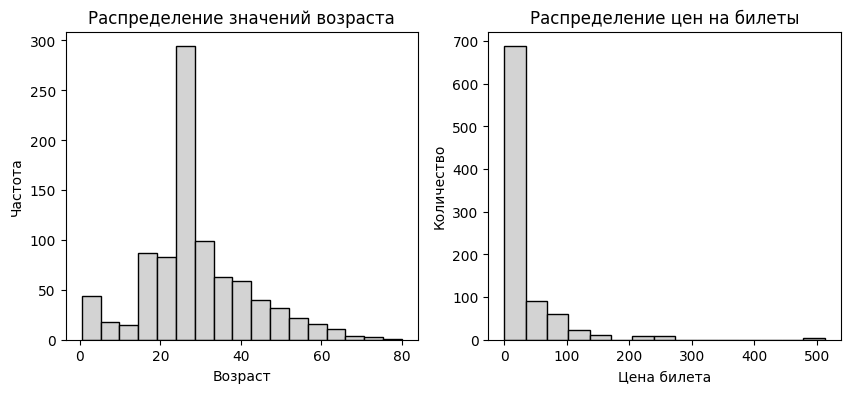

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.hist(df['Age'], bins=17, color='#D3D3D3', edgecolor='black')
ax1.set_title('Распределение значений возраста')
ax1.set_xlabel('Возраст')
ax1.set_ylabel('Частота')

ax2.hist(df['Fare'], bins=15, color='#D3D3D3', edgecolor='black')
ax2.set_title('Распределение цен на билеты')
ax2.set_xlabel('Цена билета')
ax2.set_ylabel('Количество')
plt.show() # выбросов кажется нет

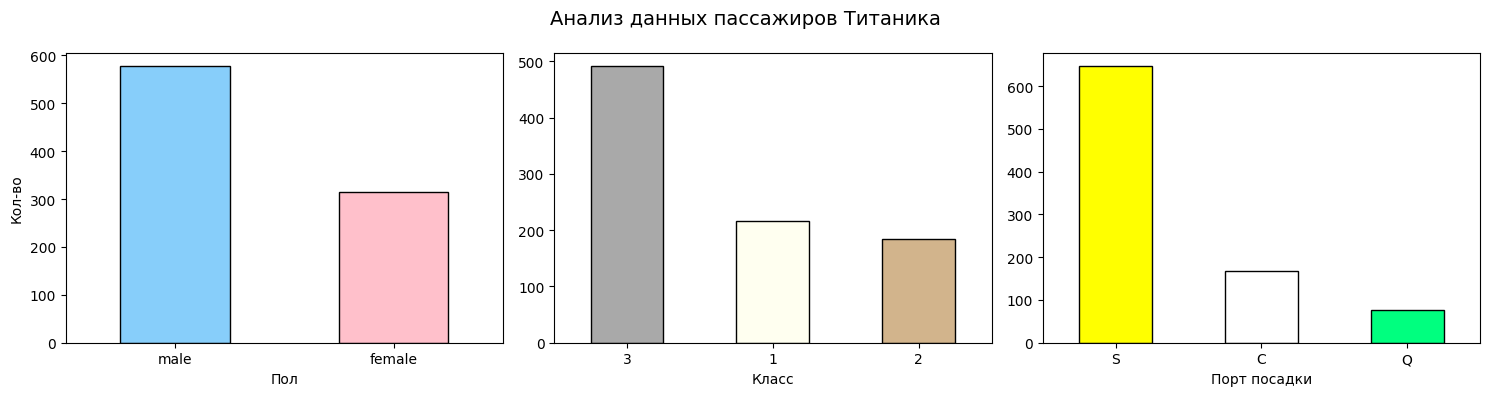

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

df['Sex'].value_counts().plot(kind='bar', color=['#87CEFA', 'pink'], edgecolor='black', ax=ax1, rot = 0)
ax1.set_xlabel('Пол')
ax1.set_ylabel('Кол-во')

df['Pclass'].value_counts().plot(kind='bar', color=['#A9A9A9', '#FFFFF0', '#D2B48C'], edgecolor='black', ax=ax2, rot = 0)
ax2.set_xlabel('Класс')

df['Embarked'].value_counts().plot(kind='bar', color=['yellow', 'white', '#00FF7F'], edgecolor='black', ax=ax3, rot = 0)
ax3.set_xlabel('Порт посадки')
plt.suptitle('Анализ данных пассажиров Титаника', fontsize=14)
plt.tight_layout()
plt.show()

# мужчин было +- в 2 раза больше чем женщин. больше всего пассажиров 3-го класса. и также самый популярный порт для посадки - S

In [7]:
count_people = 891
percentage_survived_people = df['Survived'].sum() / count_people * 100
print(f'Процент выживших пассажиров: {round(percentage_survived_people, 2)} %')
print(f'Процент умерших пассажиров: { 100 - round(percentage_survived_people, 2)} %')

Процент выживших пассажиров: 38.38 %
Процент умерших пассажиров: 61.62 %


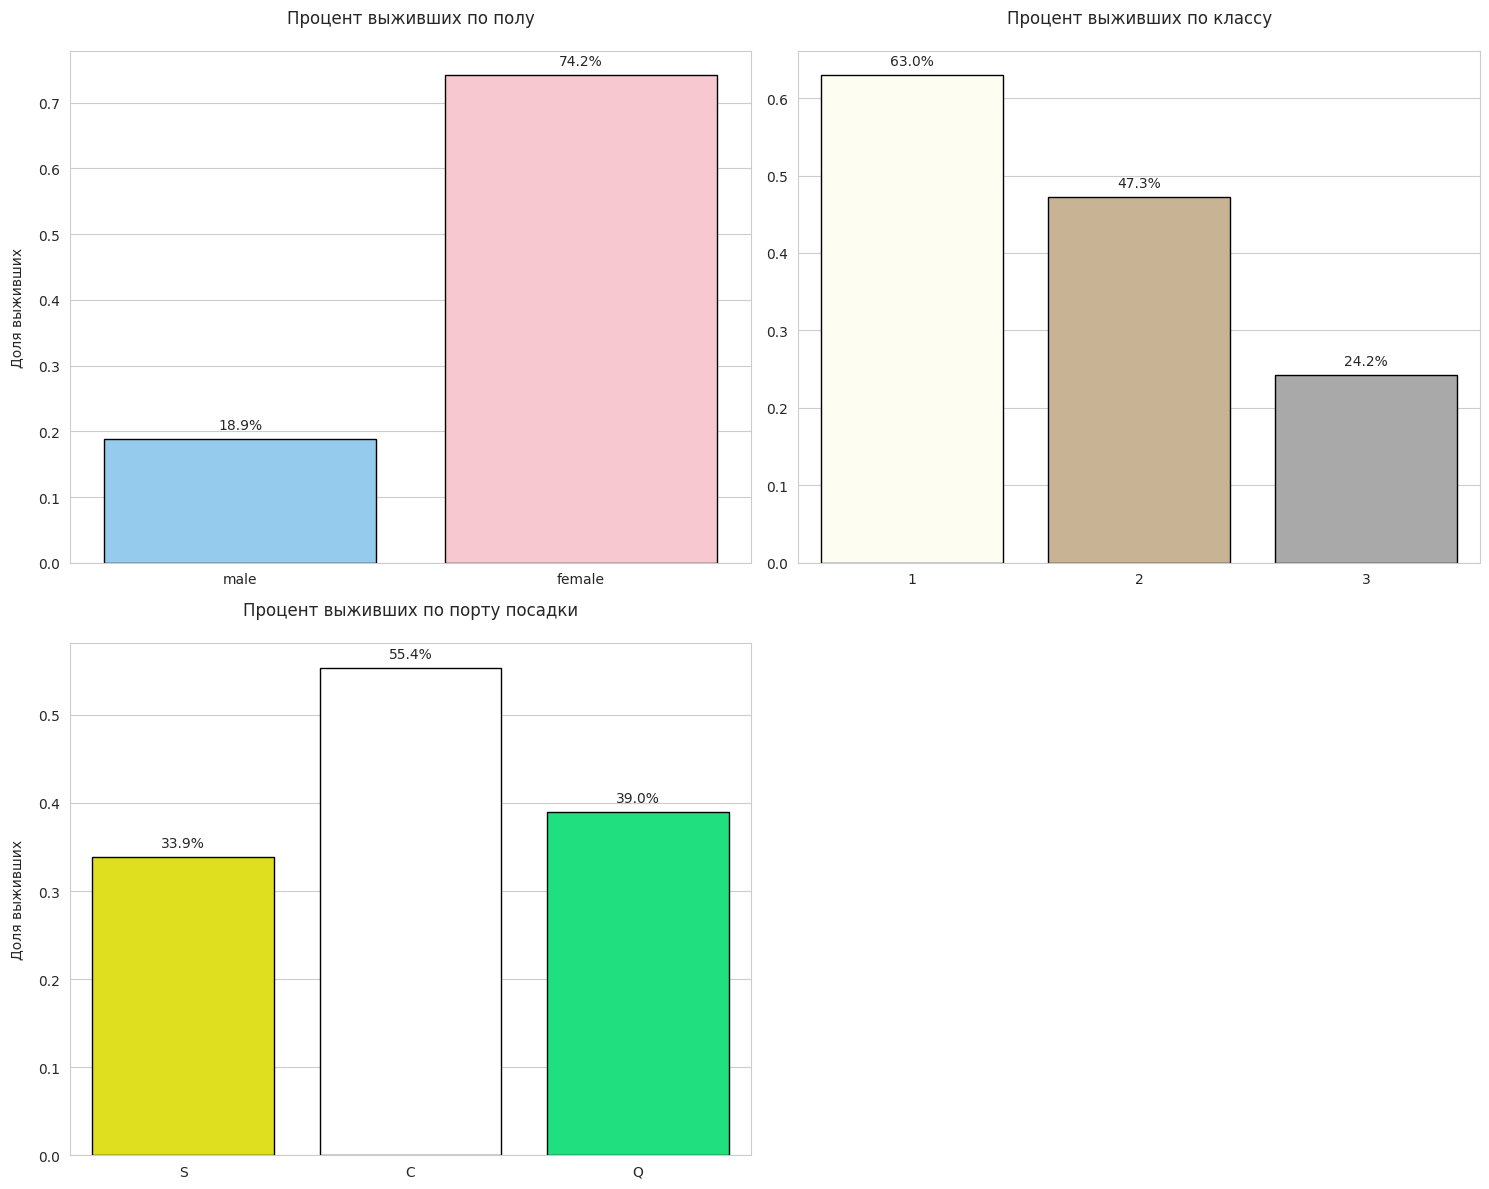

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)

ax1 = sns.barplot(x='Sex', y='Survived', data=df, hue='Sex',
                 palette=['#87CEFA', 'pink'], errorbar=None,
                 legend=False, edgecolor='black')
plt.title('Процент выживших по полу', pad=20)
plt.xlabel('')
plt.ylabel('Доля выживших', labelpad=10)

for p in ax1.patches:
    ax1.annotate(f"{p.get_height():.1%}",
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points',
                fontsize=10)

plt.subplot(2, 2, 2)
ax2 = sns.barplot(x='Pclass', y='Survived', data=df, hue='Pclass',
                 order=[1, 2, 3],
                 palette=['#FFFFF0', '#D2B48C', '#A9A9A9'],
                 errorbar=None, legend=False, edgecolor='black')
plt.title('Процент выживших по классу', pad=20)
plt.xlabel('')
plt.ylabel('')

for p in ax2.patches:
    ax2.annotate(f"{p.get_height():.1%}",
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points',
                fontsize=10)

plt.subplot(2, 2, 3)
ax3 = sns.barplot(x='Embarked', y='Survived', data=df, hue='Embarked',
                 palette=['yellow', 'white', '#00FF7F'],
                 errorbar=None, legend=False, edgecolor='black')
plt.title('Процент выживших по порту посадки', pad=20)
plt.xlabel('')
plt.ylabel('Доля выживших', labelpad=10)

for p in ax3.patches:
    ax3.annotate(f"{p.get_height():.1%}",
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points',
                fontsize=10)

plt.tight_layout()
plt.show()

# намного больше выжило женщин (возможно по каким-то моральным принципам их спасали первыми)
# больше всего умерло людей, принадлежавших третьему классу (вполне логично ведь они жили в самых нижних этажах, откуда и началось затопление). первый класс неплохо спаслись
# больше всего выживших среди тех, кто садился на борт с порта - C. (пока непонятно случайность это или ...)

In [9]:
age_groups = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 80])
df.groupby(age_groups, observed=False)['Survived'].mean() * 100
# в группах от 0-10 и 30-40 наибольший лучший процент выживаемости. старики в провале :(

,Survived
Age,
"(0, 10]",59.375000
"(10, 20]",38.260870
"(20, 30]",33.415233
"(30, 40]",44.516129
"(40, 50]",38.372093
"(50, 60]",40.476190
"(60, 80]",22.727273


In [10]:
fare_groups = pd.cut(df['Fare'], bins=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550])
df.groupby(fare_groups, observed=False)['Survived'].mean() * 100

,Survived
Fare,
"(0, 50]",32.402235
"(50, 100]",65.420561
"(100, 150]",79.166667
"(150, 200]",66.666667
"(200, 250]",63.636364
"(250, 300]",66.666667
"(300, 350]",NaN
"(350, 400]",NaN
"(400, 450]",NaN


               Age      Fare     SibSp     Parch  Survived
Age       1.000000  0.096688 -0.233296 -0.172482 -0.064910
Fare      0.096688  1.000000  0.159651  0.216225  0.257307
SibSp    -0.233296  0.159651  1.000000  0.414838 -0.035322
Parch    -0.172482  0.216225  0.414838  1.000000  0.081629
Survived -0.064910  0.257307 -0.035322  0.081629  1.000000


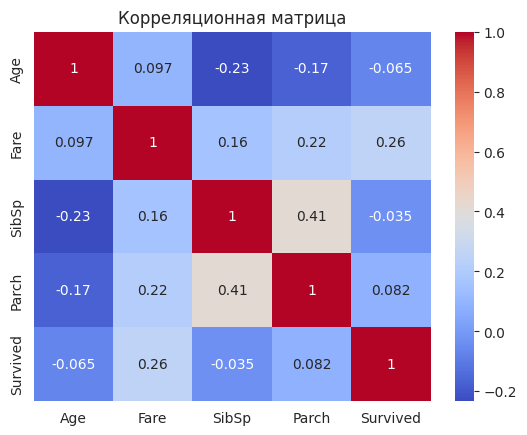

In [11]:
df_corr = df[["Age", "Fare", "SibSp", "Parch", 'Survived']].corr()
print(df_corr)

sns.heatmap(df_corr, annot=True, cmap="coolwarm")
plt.title("Корреляционная матрица")
plt.show()

# кажется если небольшая зависимость между "сиблинги/супруги на борте" и "дети/родители на борте"
# числовые переменные слабо связаны с выживанием

In [12]:
print(df['Name'])

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object


In [35]:
def count_vowel_letters(massive):
    count = 0
    for i in range(0, len(massive)):
        if massive[i] in 'AaEeIiOoUu':
            count += 1
    return count

df['count_vowel_letters'] = (df['Name']).apply(count_vowel_letters)  # apply() поочередно применяет функцию к каждому элементу колонки
print(df['count_vowel_letters'].max())
print(df['count_vowel_letters'].min())
vowel_groups = pd.cut(df['count_vowel_letters'], bins=[0, 5, 10, 15, 20, 25, 30])
df.groupby(vowel_groups, observed=False)['Survived'].mean()

# видно, что чем больше гласных - тем выше вероятность выжить
# в группе 20-25 не было ни одного человека

27
1


,Survived
count_vowel_letters,
"(0, 5]",0.222222
"(5, 10]",0.394737
"(10, 15]",0.666667
"(15, 20]",0.800000
"(20, 25]",NaN
"(25, 30]",1.000000


In [39]:
df.groupby(vowel_groups, observed=False)['Name'].count()

,Name
count_vowel_letters,
"(0, 5]",270
"(5, 10]",494
"(10, 15]",111
"(15, 20]",15
"(20, 25]",0
"(25, 30]",1


                     count_vowel_letters      Fare    Pclass  Survived
count_vowel_letters             1.000000  0.164763 -0.142584  0.333869
Fare                            0.164763  1.000000 -0.549500  0.257307
Pclass                         -0.142584 -0.549500  1.000000 -0.338481
Survived                        0.333869  0.257307 -0.338481  1.000000


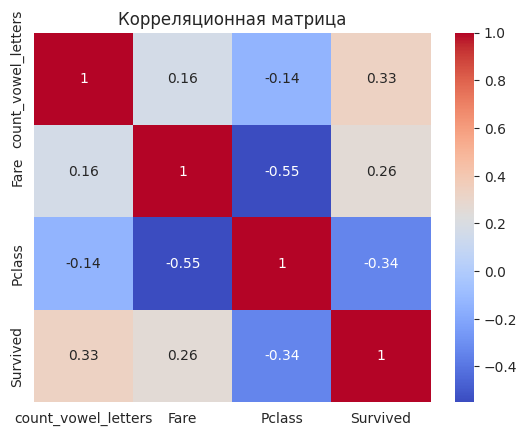

In [41]:
df_corr = df[["count_vowel_letters", "Fare", "Pclass", 'Survived']].corr()
print(df_corr)

sns.heatmap(df_corr, annot=True, cmap="coolwarm")
plt.title("Корреляционная матрица")
plt.show()

# кол-во гласных в имени не влияют напрямую на выживание (скорее косвенная связь через что-то другое)

In [50]:
df.loc[df['count_vowel_letters'] >= 15,['count_vowel_letters', 'Pclass', 'Sex']]
# нет связи между кол-вом гласных и классом, но зато сильная связь между кол-вом гласных и полом (почти все женщины)
# в общем кол-во гласных в имени скорее прокси-метрика для предсказания пола

,count_vowel_letters,Pclass,Sex
18,20,3,female
25,18,3,female
31,17,1,female
43,15,2,female
53,16,2,female
142,17,3,female
192,15,3,female
299,16,1,female
307,27,1,female
319,16,1,female
